In [1]:
import sys
sys.path.insert(1, '/content/drive/MyDrive/COVID-19-pooling') 

In [2]:
! pip install mip

In [3]:
from util import simulate_x
from test import test_RS, test_M
import numpy as np
import matplotlib.pyplot as plt
import json 

# Get Started
We will investigate different membership matrices design in this notebook. 

On Nov. 13, positive rates in NY is shifted to 2.3%, corresponding to on average 384 * 2.3% = 8.8 positives among 384 individuals. 

First, let's generate simualted infection vectors with various infection rates. 


In [4]:
num_trials = 100
n = 384
ks = list(range(1, 10)) 

In [5]:
for k in ks: 
  simulate_x(n, k/n, num_trials) 

On average, 0.91 positives in each trail.
On average, 1.95 positives in each trail.
On average, 3.33 positives in each trail.
On average, 3.66 positives in each trail.
On average, 5.23 positives in each trail.
On average, 6.07 positives in each trail.
On average, 6.94 positives in each trail.
On average, 7.72 positives in each trail.
On average, 8.64 positives in each trail.


# Benchmark: Reed Solomon Design
Let's now test the performance of a Reed-Solomon matrix design, as proposed in  [Efficient high-throughput SARS-CoV-2 testing to detect asymptomatic carriers](https://advances.sciencemag.org/content/6/37/eabc5961). 

Before running the cell below, first download the membership matrix from [this link](https://github.com/NoamShental/PBEST/blob/master/mFiles/poolingMatrix.mat) and put the file inside the './data/' folder. 

The design tests 384 individuals in 48 pools, such that each individual goes into 6 pools and each pool contains 48 individuals; the matrix is built using a Reed-Solomon error correcting code. 

In [6]:
results = []
for k in ks: 
    print(k)
    results.append(test_RS(k/384, fpr=0, fnr=0, num_trials=num_trials)) 

1
Starting trial 0
2
Starting trial 0
3
Starting trial 0
4
Starting trial 0
5
Starting trial 0
6
Starting trial 0
7
Starting trial 0
8
Starting trial 0
9
Starting trial 0


In [7]:
with open("RS.txt", 'w') as outfile:
    json.dump(results, outfile)

Text(0.5, 1.0, 'Reed Solomon')

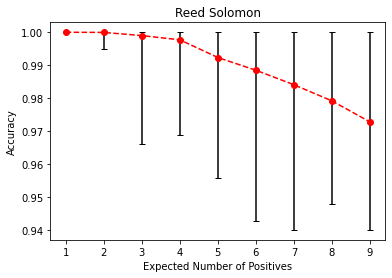

In [8]:
accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(ks, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Expected Number of Positives')
plt.ylabel('Accuracy') 
plt.title("Reed Solomon")
plt.show() 

# Membership Matrix Designs

In [9]:
f = 9/384
T = 48
n = 384

In [10]:
from optimal_sizes import optimal_pool_size
optimal_pool_size(f)

29.226336206156798

## Design 1: Constant Row Weights
The first design is a random binary matrix with a fixed row weight. Row weight corresponds to the number of samples in each pool. In theory, we can compute the optimal number of individuals in each pool by maximizing the entropy of a pool. For example, assume the current infection rate is 9/384: 

In [11]:
from membership_matrix import generate_const_row_weight

In [12]:
row_weights = list(range(20, 50, 2))
results = []
for row_weight in row_weights: 
    print("Row Weight: %s" % row_weight)
    M = generate_const_row_weight((T, n), row_weight)
    results.append(test_M(M, k/384, fpr=0, fnr=0, num_trials=num_trials)) 

Row Weight: 20
Starting trial 0
Row Weight: 22
Starting trial 0
Row Weight: 24
Starting trial 0
Row Weight: 26
Starting trial 0
Row Weight: 28
Starting trial 0
Row Weight: 30
Starting trial 0
Row Weight: 32
Starting trial 0
Row Weight: 34
Starting trial 0
Row Weight: 36
Starting trial 0
Row Weight: 38
Starting trial 0
Row Weight: 40
Starting trial 0
Row Weight: 42
Starting trial 0
Row Weight: 44
Starting trial 0
Row Weight: 46
Starting trial 0
Row Weight: 48
Starting trial 0


In [13]:
with open("D1.txt", 'w') as outfile:
    json.dump(results, outfile)

Text(0.5, 1.0, 'Constant Row Weight')

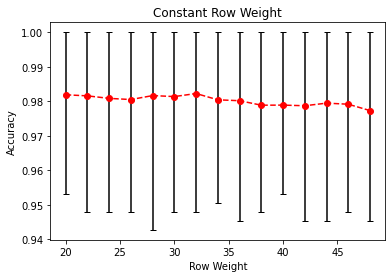

In [14]:
accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(row_weights, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Row Weight')
plt.ylabel('Accuracy')
plt.title("Constant Row Weight")
plt.show()

## Design 2: Constant Row Weights, Nearly Constant Column Weights
Since column weights corresponds to the number of times a sample is divided, it might be desirable to keep the column weights constant. Once a row weight is specified, it might not be possible to make the column weights all equal. As a result, we generate a matrix with nearly constant column weights. 

In [15]:
from membership_matrix import generate_doubly_regular_row 

In [16]:
row_weights = list(range(20, 50, 2))
results = []
for row_weight in row_weights: 
    print("Row Weight: %s" % row_weight)
    M = generate_doubly_regular_row((T, n), row_weight)
    results.append(test_M(M, f, fpr=0, fnr=0, num_trials=num_trials)) 

Row Weight: 20
Starting trial 0
Row Weight: 22
Starting trial 0
Row Weight: 24
Starting trial 0
Row Weight: 26
Starting trial 0
Row Weight: 28
Starting trial 0
Row Weight: 30
Starting trial 0
Row Weight: 32
Starting trial 0
Row Weight: 34
Starting trial 0
Row Weight: 36
Starting trial 0
Row Weight: 38
Starting trial 0
Row Weight: 40
Starting trial 0
Row Weight: 42
Starting trial 0
Row Weight: 44
Starting trial 0
Row Weight: 46
Starting trial 0
Row Weight: 48
Starting trial 0


In [17]:
with open("D2.txt", 'w') as outfile:
    json.dump(results, outfile)

Text(0.5, 1.0, 'Constant Row Weights + Nearly Constant Column Weights')

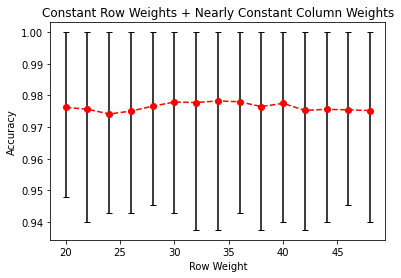

In [18]:
accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(row_weights, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Row Weight')
plt.ylabel('Accuracy')
plt.title("Constant Row Weights + Nearly Constant Column Weights")
plt.show()

### Design 3: Constant Column Weights
In practice, it is desirable to have constant column weights to ensure fairness among tested individuals. It is suggested that ([ref])(https://www.biorxiv.org/content/10.1101/035352v1.full.pdf) column weight should be up to 10. 

In [19]:
from membership_matrix import generate_const_col_weight

In [20]:
column_weights = list(range(1, 11))
results = []
for column_weight in column_weights: 
    print("Column Weight: %s" % column_weight)
    M = generate_const_col_weight((T, n), column_weight)
    results.append(test_M(M, f, fpr=0, fnr=0, num_trials=num_trials)) 

Column Weight: 1
Starting trial 0
Column Weight: 2
Starting trial 0
Column Weight: 3
Starting trial 0
Column Weight: 4
Starting trial 0
Column Weight: 5
Starting trial 0
Column Weight: 6
Starting trial 0
Column Weight: 7
Starting trial 0
Column Weight: 8
Starting trial 0
Column Weight: 9
Starting trial 0
Column Weight: 10
Starting trial 0


In [21]:
with open("D3.txt", 'w') as outfile:
    json.dump(results, outfile)

Text(0.5, 1.0, 'Constant Column Weights')

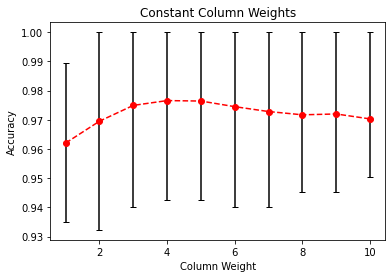

In [22]:
accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(column_weights, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Column Weight')
plt.ylabel('Accuracy')
plt.title("Constant Column Weights")
plt.show()

### Design 4: Constant Column Weights, Nearly Constant Row Weights
We would like to make column weights constant, and make the row weights nearly constant. 

In [23]:
from membership_matrix import generate_doubly_regular_col 

In [24]:
column_weights = list(range(1, 11))
results = []
for column_weight in column_weights: 
    print("Column Weight: %s" % column_weight)
    M = generate_doubly_regular_col((T, n), column_weight)
    results.append(test_M(M, f, fpr=0, fnr=0, num_trials=num_trials)) 

Column Weight: 1
Starting trial 0
Column Weight: 2
Starting trial 0
Column Weight: 3
Starting trial 0
Column Weight: 4
Starting trial 0
Column Weight: 5
Starting trial 0
Column Weight: 6
Starting trial 0
Column Weight: 7
Starting trial 0
Column Weight: 8
Starting trial 0
Column Weight: 9
Starting trial 0
Column Weight: 10
Starting trial 0


In [25]:
with open("D4.txt", 'w') as outfile:
    json.dump(results, outfile)

Text(0.5, 1.0, 'Constant Column Weights + Nearly Constant Row Weights')

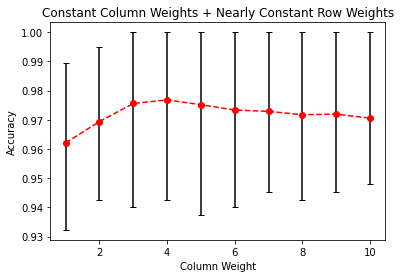

In [26]:
accuracy = []
upper = [] 
lower = [] 
for info in results:
    num_errors = info["num_errors"] 
    
    average_errors = np.average(num_errors)
    max_errors = np.max(num_errors)
    min_errors = np.min(num_errors) 
    
    accuracy.append(1 - average_errors / n)
    lower.append((max_errors - average_errors) / n)
    upper.append((average_errors - min_errors) / n) 

plt.errorbar(column_weights, accuracy, yerr=[lower, upper], capsize=3, fmt="r--o", ecolor = "black")
plt.xlabel('Column Weight')
plt.ylabel('Accuracy')
plt.title("Constant Column Weights + Nearly Constant Row Weights")
plt.show()